# Veri Bilimi için İstatistik

# Örnek Teorisi

In [1]:
import numpy as np

In [2]:
#10000 kişilik bir ilçeden 0-80 yaş arası bir populasyon belirliyoruz.
populasyon = np.random.randint(0, 80, 10000) # 0 ile 80 yaş arasında 10000 kişilik bir popülasyon aldık.

In [3]:
# bu popülasyonun 10 kişiye bakalım.
populasyon[0:10]

array([75, 44, 34, 24, 71, 45, 61, 28, 17, 51])

In [4]:
#orneklem cekimi
np.random.seed(115)   # random.seed: yapılacak olan işlemlerin her tekrar edildiğinden aynı sonuçları getirmesini garanti almaya yarayan bir işlemdir. Yani aynı örneklem üzerinden işlem yapmamızı sağlar.
orneklem = np.random.choice(a = populasyon, size = 100)  # Popülasyon içinden 100 tane örnek seçtik.
orneklem[0:10]  # 10 kadar gözlemle.

array([10, 14, 41, 60,  1, 71, 72, 69, 79, 31])

In [5]:
orneklem.mean()

38.86

In [6]:
populasyon.mean()

39.1808

In [ ]:
#orneklem dağılımı

In [7]:
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [8]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() 
+ orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean() )  / 10  # örneklemlerin aritmetik ortalamasını alıyoruz.

39.0

In [9]:
orneklem1.mean()

38.94

In [10]:
orneklem2.mean()

36.13

# Betimsel İstatistikler

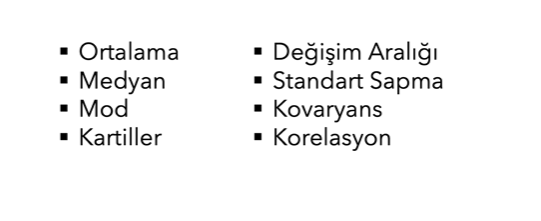

In [11]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.describe().T   # okunmasını daha anlamlı hale getirmek için sona T ekledik.

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [17]:
!pip install researchpy
import researchpy as rp

You should consider upgrading via the 'C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
# yukarıdaki işlemi rp ile yapıyoruz.

rp.summary_cont(df[["total_bill","tip","size"]])   # sayısal değişkinler için bu func kullanılıyor.

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [19]:
# kategorik değişkenlerin oranlarına baktık.

rp.summary_cat(df[["sex","smoker","day"]])    # kategorik değişkinler için bu func kullanılıyor.

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [20]:
df[["tip","total_bill"]].cov()   # kovaryansına bakıyoruz. tip ile total_bill arasındaki ilişkinin değişkenliğini gösteriyor.

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [21]:
df[["tip","total_bill"]].corr()   # korelasyona bakıyoruz. tip ile total_bill arasındaki ilişkinin şiddetini gösteriyor.

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


# İş Uygulaması: Fiyat Stratejisi Karar Destek

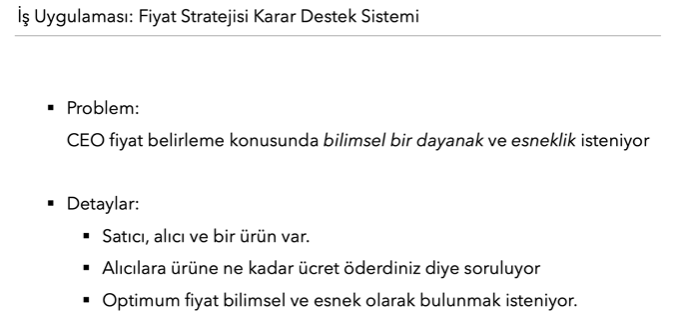

In [22]:
import numpy as np
fiyatlar = np.random.randint(10,110, 1000)  # 1000 kişi ile görüştüğümüzü ve 10-110 arasında fiyat vermeyi düşündüklerini kabul ediyoruz.

In [23]:
fiyatlar.mean()

58.492

In [24]:
import statsmodels.stats.api as sms

In [26]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(56.67953887736034, 60.30446112263965)

In [27]:
def yazdir(metin):
    print(metin, "program öğrenilecek")
 
yazdir("O")

O program öğrenilecek


In [28]:
print("metin", "program öğrenilecek")

metin program öğrenilecek


# Olasılık Dağılımları

## Bernoulli Dağılımı

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

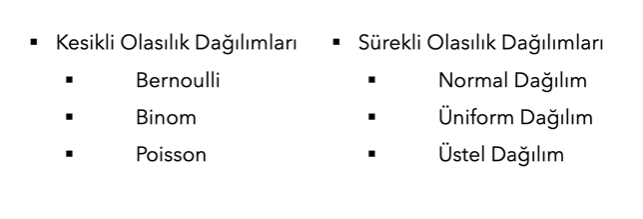

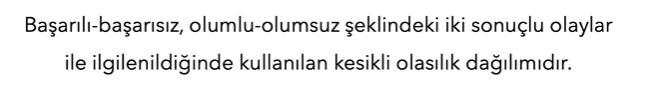

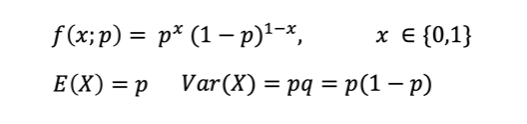

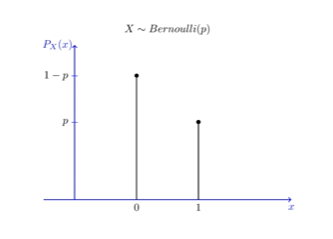

In [25]:
from scipy.stats import bernoulli

In [26]:
p = 0.6

In [27]:
rv = bernoulli(p)
rv.pmf(k = 0)  # 1 tura gelme, 0 ise yazı gelme olasılığıdır.

0.4

## Büyük Sayılar Yasası

**Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.**

In [4]:
rng.randint(0, 2, size = 5)

array([1, 0, 1, 0, 0])

In [2]:
import numpy as np
rng = np.random.RandomState(123)
for i in np.arange(1,21):   # 1-20 arasında değerler veriyor.
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size = deney_sayisi)  # deney sayısı kadar 0 ve 1 oluştur.
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı:",deney_sayisi,"---",'Yazı Olasılığı: %.2f' % (yazi_olasiliklari * 100))

Atış Sayısı: 2 --- Yazı Olasılığı: 50.00
Atış Sayısı: 4 --- Yazı Olasılığı: 0.00
Atış Sayısı: 8 --- Yazı Olasılığı: 62.50
Atış Sayısı: 16 --- Yazı Olasılığı: 43.75
Atış Sayısı: 32 --- Yazı Olasılığı: 46.88
Atış Sayısı: 64 --- Yazı Olasılığı: 56.25
Atış Sayısı: 128 --- Yazı Olasılığı: 50.78
Atış Sayısı: 256 --- Yazı Olasılığı: 52.73
Atış Sayısı: 512 --- Yazı Olasılığı: 52.93
Atış Sayısı: 1024 --- Yazı Olasılığı: 50.20
Atış Sayısı: 2048 --- Yazı Olasılığı: 48.58
Atış Sayısı: 4096 --- Yazı Olasılığı: 49.49
Atış Sayısı: 8192 --- Yazı Olasılığı: 49.58
Atış Sayısı: 16384 --- Yazı Olasılığı: 49.96
Atış Sayısı: 32768 --- Yazı Olasılığı: 50.00
Atış Sayısı: 65536 --- Yazı Olasılığı: 49.68
Atış Sayısı: 131072 --- Yazı Olasılığı: 49.97
Atış Sayısı: 262144 --- Yazı Olasılığı: 50.13
Atış Sayısı: 524288 --- Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 --- Yazı Olasılığı: 50.09


In [1]:
1/5

0.2

## Binom Dağılımı

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

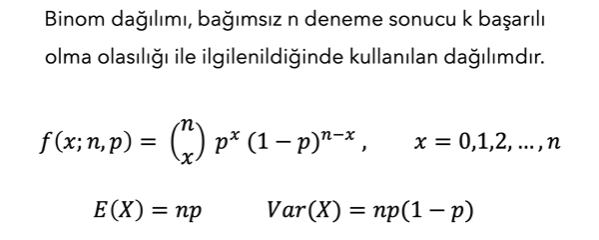

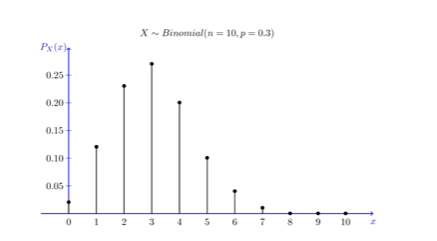

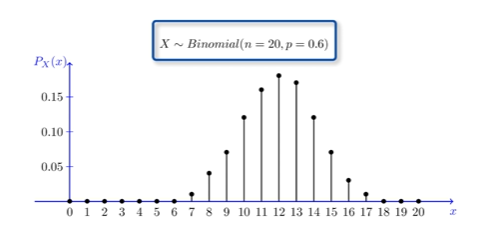

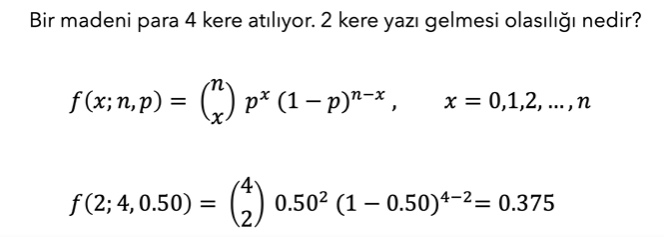

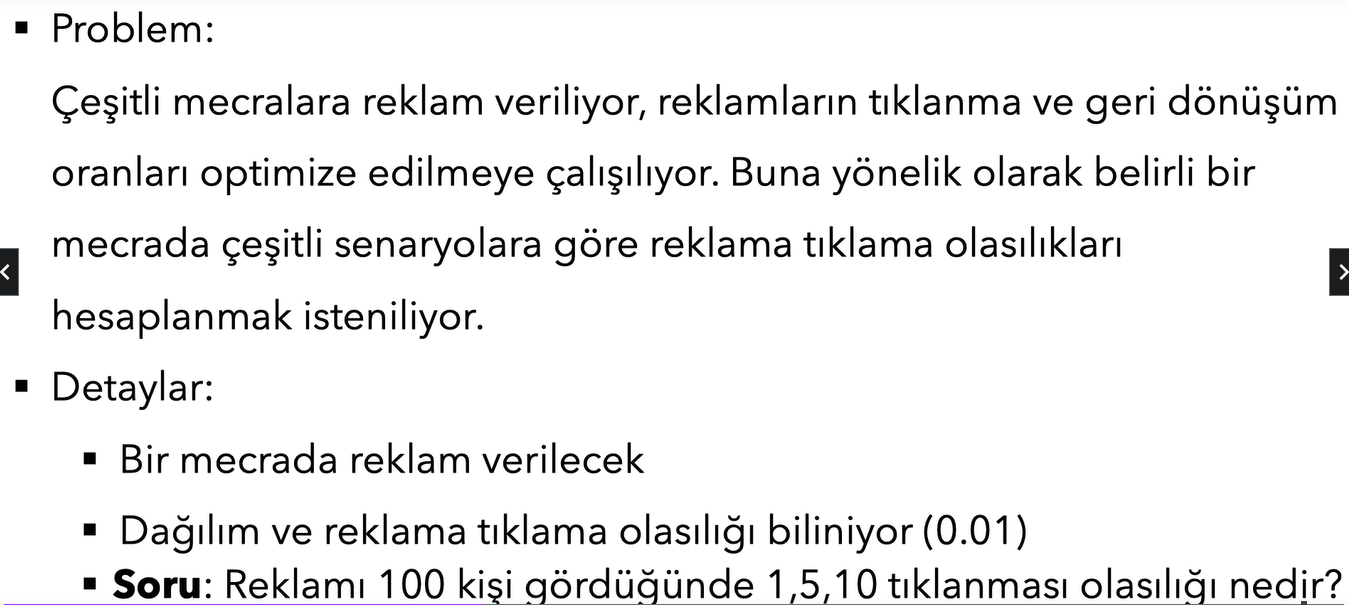

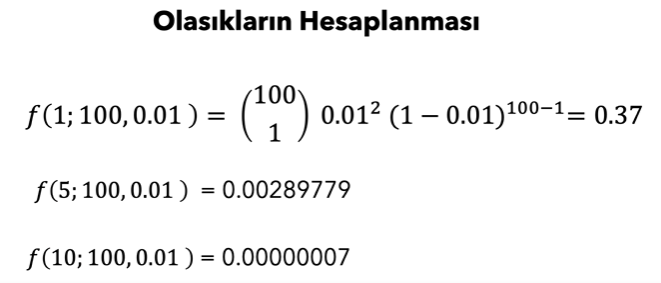

In [ ]:
#!!! Burada reklamı 100 kişi gördüğünde 1 kişinin tıklama olasılığını hesapladık. başarı oranı p=0.01 dir.
#!!! Mesele şu: 5 ve 10 kişinin tıklama olasılığı arasında fark yoksa bu durumda 10 kişinin tıklaması için kaç kişinin bu reklamı görmesi konusunda araştırma yaparız.

In [29]:
from scipy.stats import binom

In [34]:
p = 0.01
n = 100
rv = binom(n, p)
print(rv.pmf(1))   # print(binom.pmf(x,n,p))  x=1,5,10 burası için
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


## Poisson Dağılımı

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

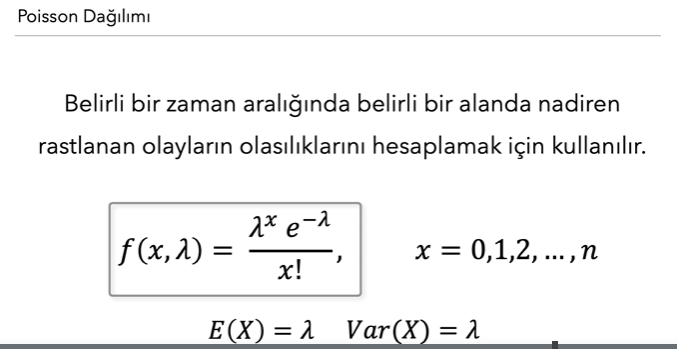

In [ ]:
# Poisson dağılımında mean ve varyans birbirine eşittir. 
# Lambda beklenen sonucun ortalama gerçekleşme sayısıdır yani ortalamadır.

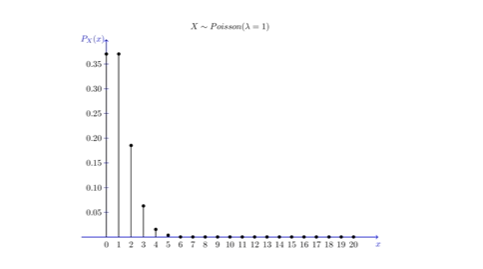

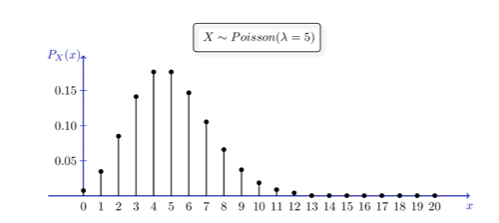

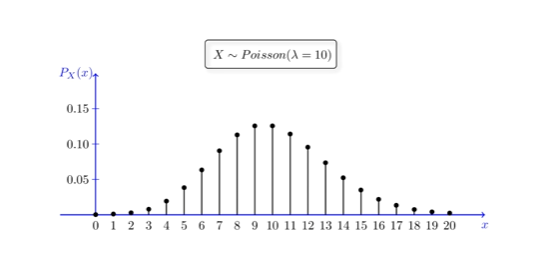

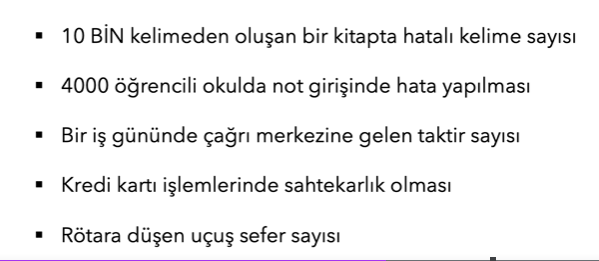

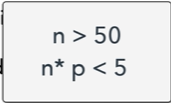

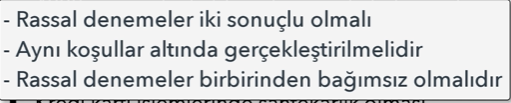

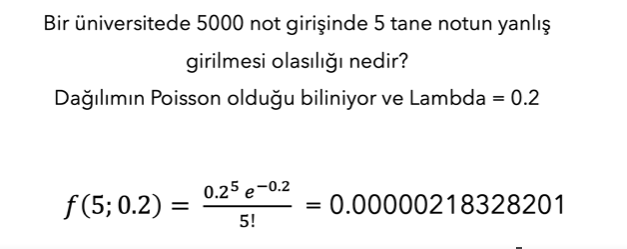

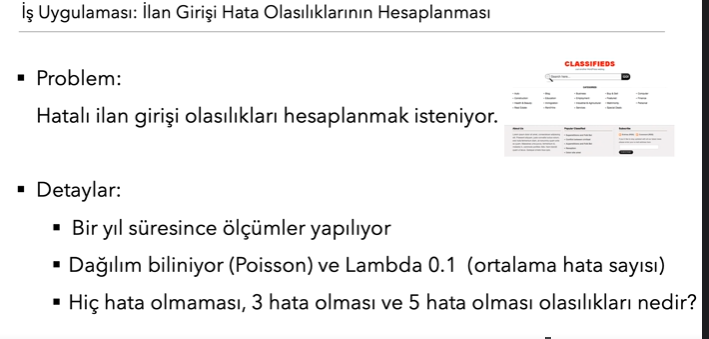

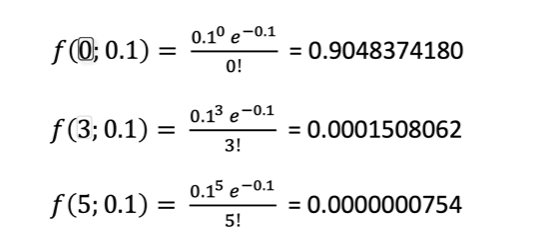

In [35]:
from scipy.stats import poisson

In [36]:
lambda_ = 0.1

In [24]:
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0))

0.9048374180359595


In [25]:
print(rv.pmf(k = 3))

0.00015080623633932676


In [26]:
print(rv.pmf(k = 5))

7.54031181696634e-08


## Normal Dağılım

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

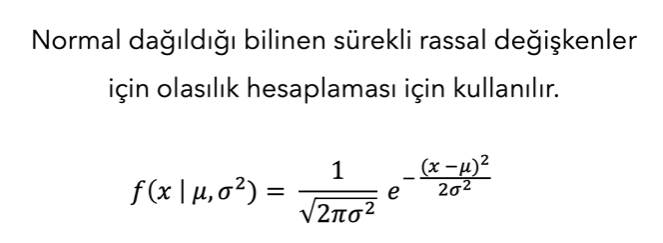

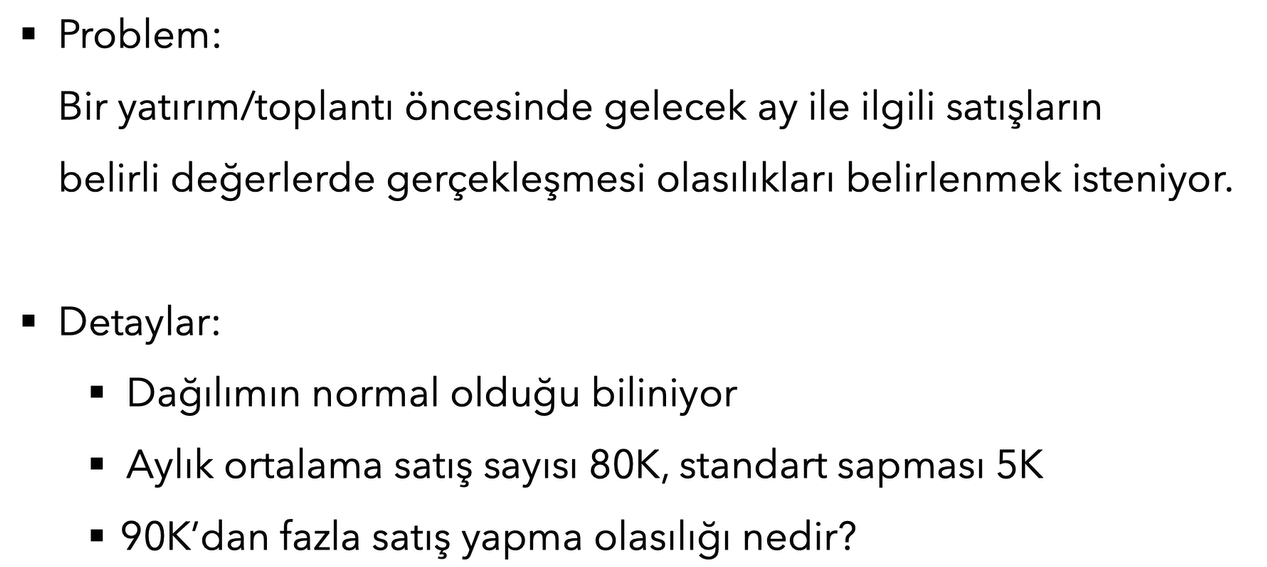

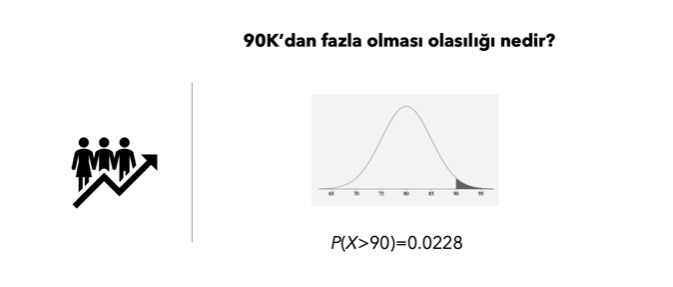

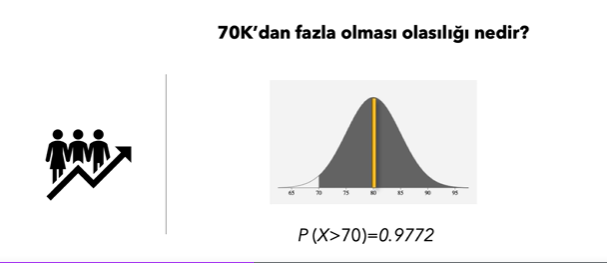

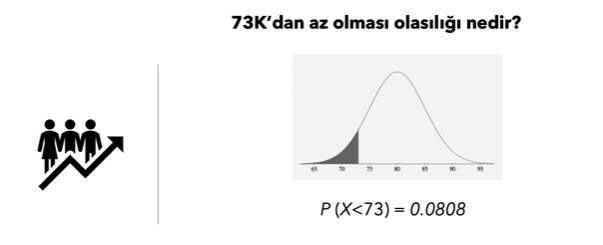

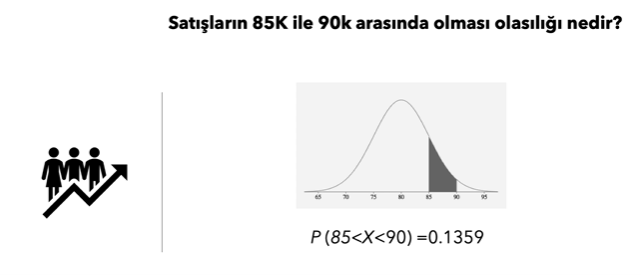

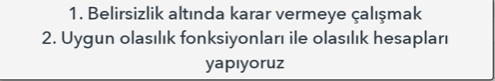

In [5]:
from scipy.stats import norm

In [6]:
#90'dan fazla olması 
1-norm.cdf(90, 80, 5)

0.02275013194817921

In [7]:
#70'den fazla olması
1-norm.cdf(70, 80, 5)

0.9772498680518208

In [8]:
#73'den az olması
norm.cdf(73, 80, 5)

0.08075665923377107

In [ ]:
#85 ile 90 arasında olması

In [9]:
norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5)

0.13590512198327787

# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


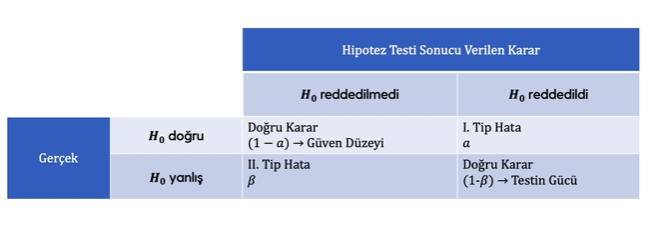

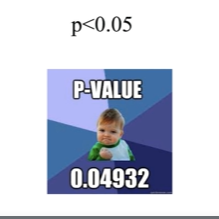

In [1]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [2]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [6]:
import scipy.stats as stats

In [7]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## Varsayımlar

In [ ]:
#normallik varsayımı

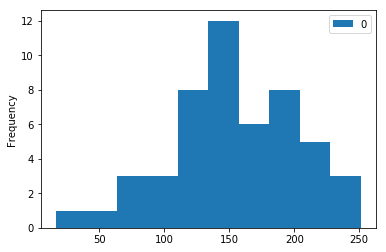

In [9]:
#histogram
pd.DataFrame(olcumler).plot.hist();

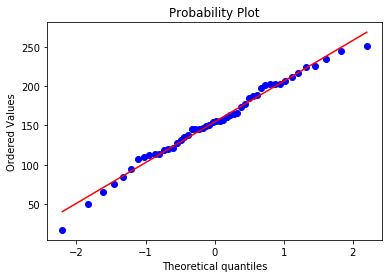

In [10]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilks Testi

H0: Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur

H1: ... fark vardır

In [11]:
from scipy.stats import shapiro

In [12]:
shapiro(olcumler)

(0.9853105545043945, 0.7848747968673706)

In [13]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


## Hipotez Testinin Uygulanması

In [14]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

H0: Web sitemizde geçirilen ortalama süre 170'tir
H1: .. değiştir

## Nonparametrik Tek Örneklem Testi

In [16]:
from statsmodels.stats.descriptivestats import sign_test

In [17]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

# Tek Örneklem Oran Testi

HO: p = 0.125 

H1: p != 0.125

In [18]:
from statsmodels.stats.proportion import proportions_ztest

In [19]:
count = 40
nobs = 500
value = 0.125

In [20]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

## Bağımsız İki Örneklem T Testi

H0: M1 = M2 

H1: M1 != M2

In [ ]:
#VERI TIPI I

In [21]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [ ]:
#VERI TIPI II

In [23]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


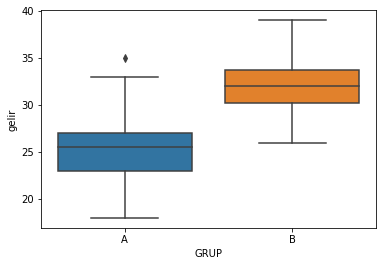

In [25]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolü

In [26]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [27]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [ ]:
#normallik varsayımı

In [ ]:
from scipy.stats import shapiro

In [28]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [29]:
shapiro(A_B.B)

(0.9561261534690857, 0.2458445429801941)

In [ ]:
#varyans homojenligi varsayımı

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [30]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

## Hipotez Testi

In [31]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [32]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


## Nonparametrik Bağımsız İki Örneklem Testi

In [33]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [34]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


# Bağımlı İki Örneklem T Testi

In [1]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [2]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [3]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [5]:
 np.arange(len(oncesi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [4]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



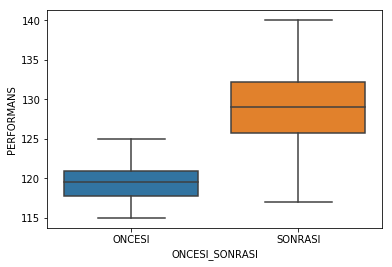

In [7]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

## Varsayım Kontrolleri 

In [8]:
from scipy.stats import shapiro

In [10]:
shapiro(AYRIK.ONCESI)

(0.9543654918670654, 0.10722342133522034)

In [11]:
shapiro(AYRIK.SONRASI)

(0.9780087471008301, 0.6159457564353943)

In [13]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

## Hipotez Testi

In [14]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [16]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


## Nonparametrik Bağımlı İki Örneklem Testi

In [17]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [18]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


## İki Örneklem Oran Testi

In [19]:
from statsmodels.stats.proportion import proportions_ztest

In [20]:
import numpy as np
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [22]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

In [24]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Varsayım Kontrolü

In [25]:
from scipy.stats import shapiro

In [26]:
shapiro(ABC["GRUP_A"])

(0.9697431921958923, 0.5321715474128723)

In [27]:
shapiro(ABC["GRUP_B"])

(0.9789854884147644, 0.7979801297187805)

In [28]:
shapiro(ABC["GRUP_C"])

(0.9579201340675354, 0.273820161819458)

In [29]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

## Hipotez Testi

In [32]:
from scipy.stats import f_oneway

In [33]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [34]:
print('{:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


In [36]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


## Nonparametrik Hipotez Testi

In [39]:
from scipy.stats import kruskal

In [40]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

## Korelasyon Analizi

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


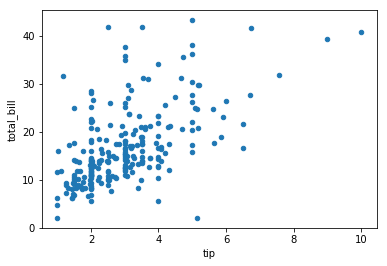

In [5]:
df.plot.scatter("tip","total_bill");

# Varsayım Kontrolü

In [6]:
from scipy.stats import shapiro

In [7]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


# Hipotez Testi

### Korelasyon Katsayısı

In [8]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [9]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

### Korelasyonunu Anlamlılığının Testi

In [10]:
from scipy.stats.stats import pearsonr

In [16]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


## Nonparametrik Hipotez Testi

In [13]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [15]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [17]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
